In [1]:
import numpy as np
from stochastic_media import LayeredSample, SLMMaterial, SLMSimulator
import matplotlib.pyplot as plt
from materials.matlib import portland_concrete, magnetite, baryte, limestone
from atomxs.attenuation import attenuation_coeff

portland_concrete.density = 1.9

Prepare sample

In [2]:
energy = np.array([1e6])
cement_xs = attenuation_coeff(portland_concrete, energy)
magnetite_xs = attenuation_coeff(magnetite, energy)

In [3]:
mat1 = SLMMaterial(name="A", xs=cement_xs)
mat2 = SLMMaterial(name="B", xs=magnetite_xs)
sample = LayeredSample(width=20.0, dx=0.1, material_1=mat1, material_2=mat2, volume_fraction_1=0.5)

simulate attenuation

In [4]:
sim = SLMSimulator(sample)
attenuation = sim.simulate_attenuation(size=10000)
xs = -np.log(attenuation)/sample.width

In [5]:
att_histogram, att_bins = np.histogram(attenuation, bins=50, weights=np.ones_like(attenuation)/len(attenuation))
xs_histogram, xs_bins = np.histogram(xs, bins=50, weights=np.ones_like(attenuation)/len(attenuation))

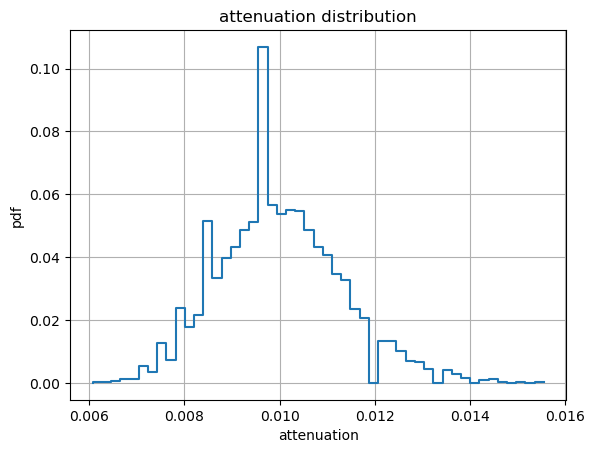

In [6]:
plt.step(att_bins[1:],att_histogram)
plt.title('attenuation distribution')
plt.xlabel('attenuation')
plt.ylabel('pdf')
plt.grid()

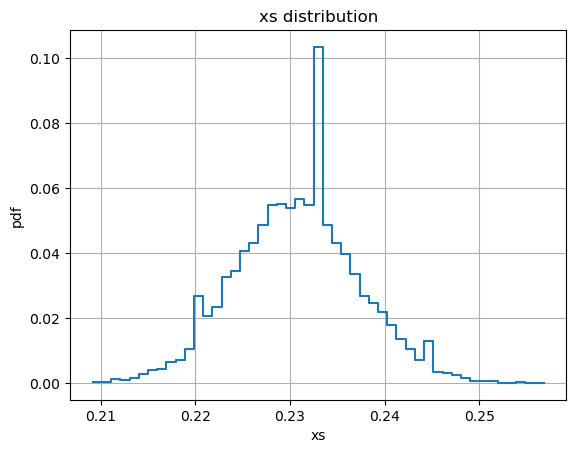

In [7]:
plt.step(xs_bins[1:],xs_histogram)
plt.title('xs distribution')
plt.xlabel('xs')
plt.ylabel('pdf')
plt.grid()